In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Прочитайте csv файл (використовуйте функцію read_csv)

In [3]:
df = pd.read_csv('bestsellers with categories.csv')
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


Виведіть перші п'ять рядків (використовується функція head)

In [4]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Виведіть розміри датасету (використовуйте атрибут shape)

In [5]:
row, column = df.shape
answer_book = f'Відповідь: Датасет зберігає {row} книг'
answer_book

'Відповідь: Датасет зберігає 550 книг'

Первинне дослідження даних

In [6]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [7]:
missing_data = df.isnull().sum() / len(df)
count = 0
for i in missing_data:
    count+=i
if count != 0:
    answer_miss = 'Так'
else:
    answer_miss = 'Ні'
f'Чи є в якихось змінних пропуски? Відповідь: {answer_miss}'    

'Чи є в якихось змінних пропуски? Відповідь: Ні'

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [8]:
unique_genres = df['genre'].unique()
answer_unique = f'Унікальні жанри - {unique_genres}'
answer_unique

"Унікальні жанри - ['Non Fiction' 'Fiction']"

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

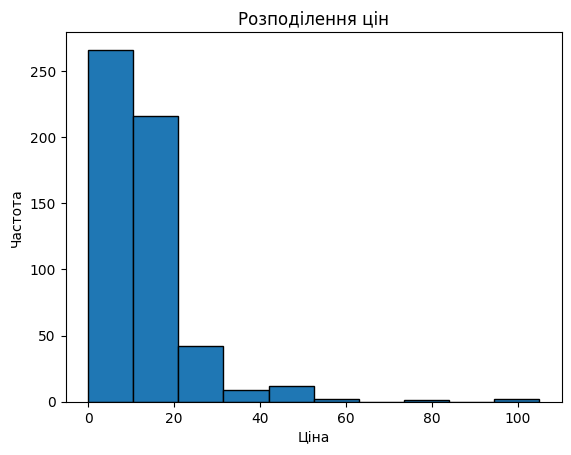

In [9]:
%matplotlib inline
df['price'].plot(kind='hist', bins=10, edgecolor='black')

plt.title('Розподілення цін')
plt.xlabel('Ціна')
plt.ylabel('Частота')

plt.show()

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [10]:
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()
print(f'Максимальна ціна: {max_price}\nМінімальна ціна: {min_price}\nСередня ціна: {mean_price}\nМедіанна ціна: {median_price}')

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


Пошук та сортування даних

Який рейтинг у датасеті найвищий?

In [14]:
max_rating = df['user_rating'].max()
print(f'Max rating: {max_rating}')

Max rating: 4.9


 Скільки книг мають такий рейтинг?

In [17]:
books_with_max_rating = df[df['user_rating'] == max_rating].shape[0]
print(f'Books with max rating: {books_with_max_rating}')

Books with max rating: 52


Яка книга має найбільше відгуків?

In [23]:
max_review_idx = df['reviews'].idxmax()
book_with_max_review = df.loc[max_review_idx, 'name']
author = df.loc[max_review_idx, 'author']
print(f'Book with max reviews - {book_with_max_review}/{author}')

Book with max reviews - Where the Crawdads Sing/Delia Owens


З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?

In [30]:
top_books_2015 = df[df['year'] == 2015]
top_50_books_2015 = df.sort_values(by='user_rating',ascending=False).head(50)
max_price_from_50_books_idx = top_50_books_2015['price'].idxmax()
max_price_top_50_book = top_50_books_2015.loc[max_price_from_50_books_idx, 'name']
print(f'The most expensive book from the top 50 in 2015 is {max_price_top_50_book}')

The most expensive book from the top 50 in 2015 is Hamilton: The Revolution


Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?

In [40]:
all_fiction = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)]
top_50_fiction = df.sort_values(by='user_rating', ascending=False).head(50)
print(f'{len(top_50_fiction)} books')

50 books


Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?

In [47]:
books_with_rating_4_9 = df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))]
num_books_with_rating_4_9 = books_with_rating_4_9.shape[0]
if num_books_with_rating_4_9 <= 1:
    print(f'{num_books_with_rating_4_9} book')
else:
    print(f'{num_books_with_rating_4_9} books')

1 book


І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
Відповідь: Яка книга остання у відсортованому списку? 

In [52]:
books_2015_under_8 = df[(df['year'] == 2015) & (df['price'] < 8)]
sorted_books_2015_under_8 = books_2015_under_8.sort_values(by='price')
sorted_books_2015_under_8.iloc[-1]

name           Old School (Diary of a Wimpy Kid #10)
author                                   Jeff Kinney
user_rating                                      4.8
reviews                                         6169
price                                              7
year                                            2015
genre                                        Fiction
Name: 253, dtype: object

Агрегування даних та з'єднання таблиць

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам
Відповідь: Максимальна ціна для жанру Fiction: Відповідь
Відповідь: Мінімальна ціна для жанру Fiction: Відповідь
Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь
Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь

In [53]:
price_summary = df.groupby('genre')['price'].agg(['min', 'max'])
price_summary

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


In [57]:
max_price_fiction = price_summary.loc['Fiction', 'max']
min_price_fiction = price_summary.loc['Fiction', 'min']
max_price_nonfiction = price_summary.loc['Non Fiction', 'max']
min_price_nonfiction = price_summary.loc['Non Fiction', 'min']
print(f'max_price_fiction: {max_price_fiction}\nmin_price_fiction: {min_price_fiction}\nmax_price_nonfiction:{max_price_nonfiction}\n' +
f'min_price_nonfiction:{min_price_nonfiction}')

max_price_fiction: 82
min_price_fiction: 0
max_price_nonfiction:105
min_price_nonfiction:0


Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, 
для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [61]:
books_per_author = df.groupby('author').size().reset_index(name='books')
table_shape = books_per_author.shape
max_books_author = books_per_author.loc[books_per_author['books'].idxmax()]
print(f"Розмірність таблиці: {table_shape}")
print(f"Автор, який має найбільше книг: {max_books_author['author']}")
print(f"Кількість книг цього автора: {max_books_author['books']}")

Розмірність таблиці: (248, 2)
Автор, який має найбільше книг: Jeff Kinney
Кількість книг цього автора: 12


Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора 
(використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні
Відповідь: У якого автора середній рейтинг мінімальний? Відповідь:
Відповідь: Який у цього автора середній рейтинг? Відповідь:

In [63]:
average_rating_per_author = df.groupby('author')['user_rating'].agg('mean').reset_index(name='average_rating')
min_avg_rating_author = average_rating_per_author.loc[average_rating_per_author['average_rating'].idxmin()]
print(f"Автор, у якого середній рейтинг мінімальний: {min_avg_rating_author['author']}")
print(f"Середній рейтинг цього автора: {min_avg_rating_author['average_rating']}")

Автор, у якого середній рейтинг мінімальний: Donna Tartt
Середній рейтинг цього автора: 3.9


З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
Відповідь: Який автор перший у списку?

In [68]:
combined_df = pd.concat([books_per_author.set_index('author'), average_rating_per_author.set_index('author')], axis=1).reset_index()

sorted_combined_df = combined_df.sort_values(by=['books', 'average_rating'])

print(f"Автор, який перший у списку: {sorted_combined_df.iloc[0]['author']}")

Автор, який перший у списку: Muriel Barbery


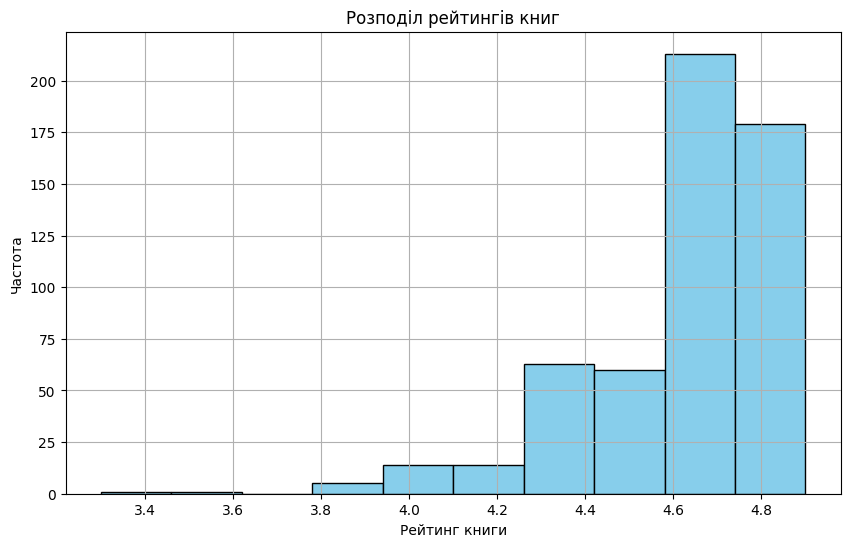

In [69]:
plt.figure(figsize=(10, 6))
plt.hist(df['user_rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Рейтинг книги')
plt.ylabel('Частота')
plt.title('Розподіл рейтингів книг')
plt.grid(True)
plt.show()

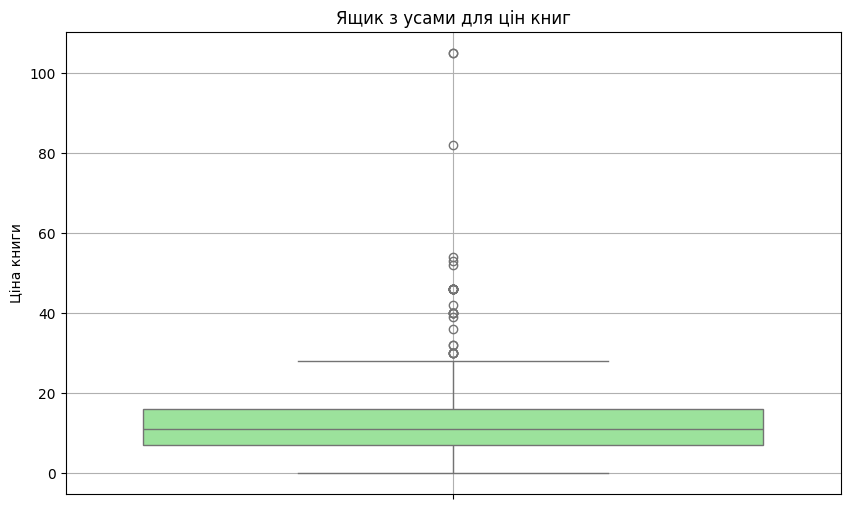

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['price'], color='lightgreen')
plt.ylabel('Ціна книги')
plt.title('Ящик з вусами для цін книг')
plt.grid(True)
plt.show()

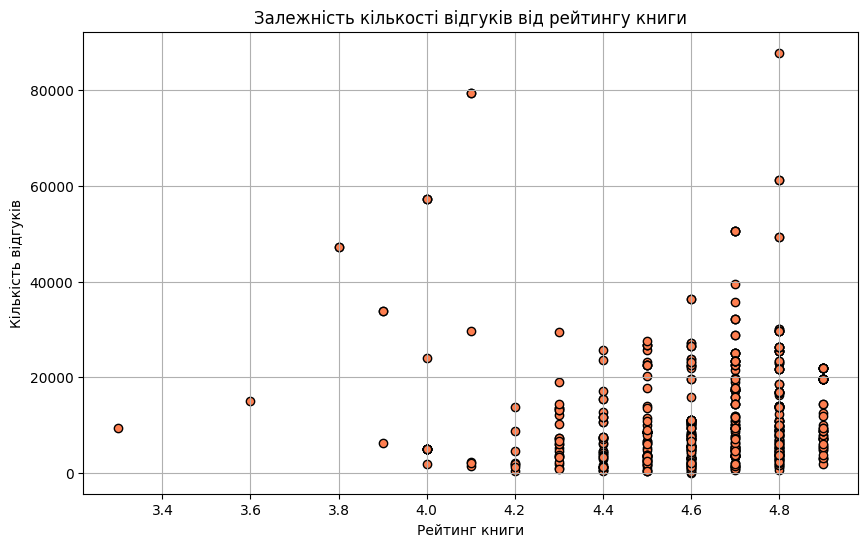

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(df['user_rating'], df['reviews'], color='coral', edgecolor='black')
plt.xlabel('Рейтинг книги')
plt.ylabel('Кількість відгуків')
plt.title('Залежність кількості відгуків від рейтингу книги')
plt.grid(True)
plt.show()